# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
## Импорт библиотек
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

In [2]:
## Чтение файла из библиотеки
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)

In [3]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


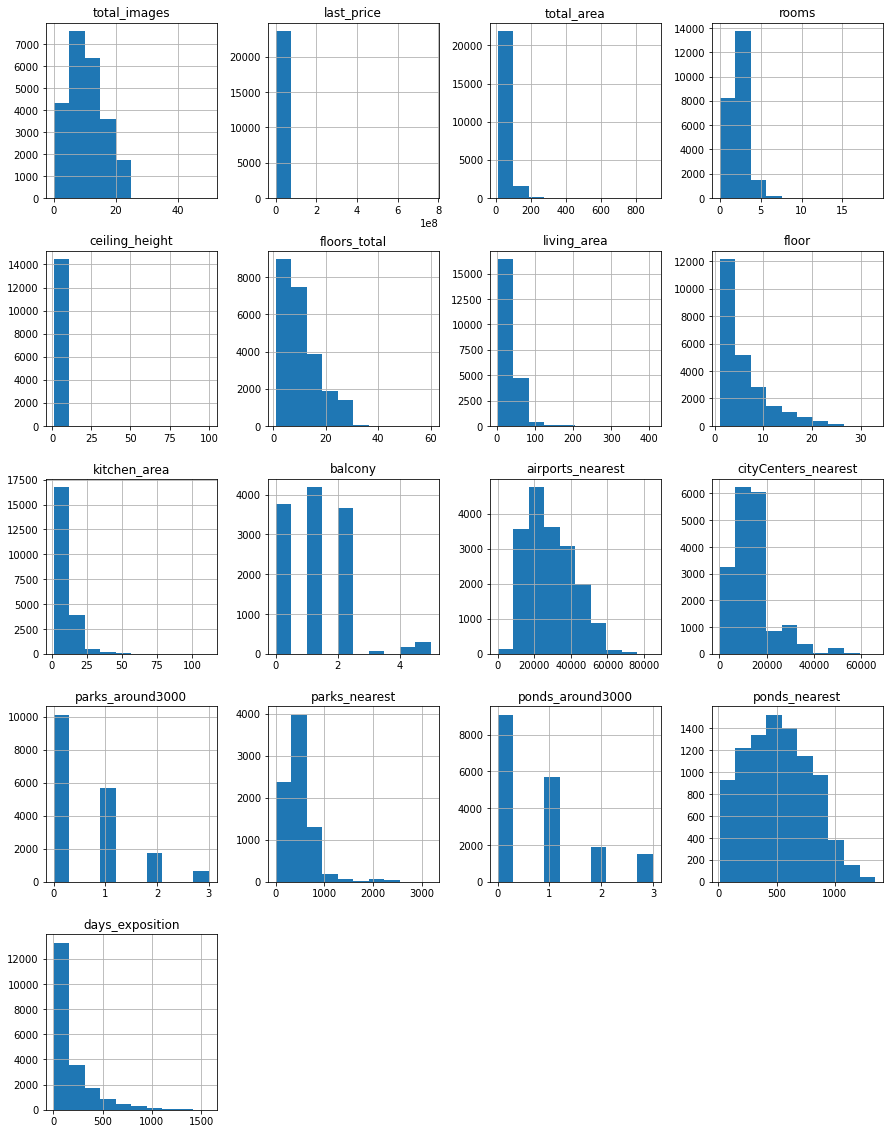

In [5]:
## Просмотр общей гистограммы по всей таблице
data.hist(figsize=(15, 20));

## Вывод ##
1. first_day_exposition - object - должен быть тип datetime
2. ceiling_height - очень много пропусков
3. floors_total - должен быть тип int, количество этажей неможет быть вещественным числом и есть пропущенные значения всего 86 строк, удалим эти строки 
4. is_apartment - object, должен быть тип bool и есть пропущенные значения, заменим значение на False, т.к. это скорее всего не аппартаменты
5. living_area и kitchen_area - есть пропущенные значения, оставим эти строки
6. balcony - должен быть тип int, есть пропущенные значения, заменим значение на 0 т.к. скорее всего балконов нет
7. locality_name - есть пропущенные значения, удалим эти строки, их немного и причина пропусков неясна
8. airports_nearest - возможно аэропортов нет рядом, пропущенные значения заменим на 99999
9. city_centers_nearest - до центра города далеко, пропущенные значения заменим на 99999
10. parks_around3000 - тип должен быть int, пропущенные значения заменим на 99999
11. parks_nearest - пропущенные значения означают парков рядом нет заменим на 0
12. ponds_around3000 - тип должен быть int, пропущенные значения заменим на 99999
13. ponds_nearest - пропущенные значения означают водоемов рядом нет заменим на 0
14. days_exposition - тип должен быть int, пропущенные значения заменим медианным значением

### Предобработка данных

In [6]:
# Переименуем столбцы
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

In [7]:
# Просмотр Количества пропусков в столбцах
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# переведем столбец с датой в формат datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [9]:
# Удалим строки этажей квартиры и заменим тип на int
data = data.dropna(subset=['floors_total'])
data['floors_total'] = data['floors_total'].astype('int64')

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

In [10]:
# заменим пропуски в balcony и заменим тип данных
data['balcony'] = data['balcony'].fillna(0).astype('int64')

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

In [11]:
# заменим пропуски в is_apartment и заменим тип данных
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

In [12]:
# Изменим тип данных на int в days_exposition изаменим пропуски на медианное значение
print(data['days_exposition'].median())
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median()).astype('int64')

95.0


In [13]:
#заменим тип данных в airports_nearest
data['airports_nearest'] = data['airports_nearest'].fillna(99999)

In [14]:
#заменим тип данных в parks_around3000
data['parks_around3000'] = data['parks_around3000'].fillna(99999).astype('int64')

In [15]:
#заменим тип данных в ponds_around3000
data['ponds_around3000'] = data['ponds_around3000'].fillna(99999).astype('int64')

In [16]:
#заменим тип данных в living_area
data['living_area'] = data['living_area'].fillna(data['living_area'].median()).astype('int64')

In [17]:
#заменим тип данных в kitchen_area
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median()).astype('int64')

In [18]:
#заменим тип данных в city_centers_nearest
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(99999).astype('int64')

In [19]:
#заменим тип данных в ceiling_height
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [20]:
#заменим тип данных в parks_nearest
data['parks_nearest'] = data['parks_nearest'].fillna(0)

In [21]:
#заменим тип данных в ponds_nearest
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

In [22]:
# Удалим пустые значения в locality_name
data = data.dropna(subset=['locality_name'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  int64         
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  int64         
 13  balcony         

## Поиск уникальных значений и удаление дубликатов 
#### Что сделаем
1. Заменим все ё на е
2. Приведем все к нижнему регистру
3. Заменим городской поселок на поселок городского типа

In [24]:
# Подсчет уникальных значений
print(data['locality_name'].value_counts().count())


364


In [25]:
# Переводим все в нижний регистр
data['locality_name'] = data['locality_name'].str.lower()

In [26]:
# Заменяем все ё на е
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [27]:
# Заменяем городской поселок на поселок городского типа
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

In [28]:
# Проверяем наличие явных дубликатов
data.duplicated().sum()

0

###  Устранянем редкие и выбивающиеся значения

In [29]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,33.875705,5.878124,10.189136,0.593677,45487.911946,34223.239465,23339.934140,167.169998,23340.055209,198.738129,169.203692
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,21.186871,4.871485,5.640145,0.960660,32125.446415,37073.615761,42299.486932,306.301628,42299.420129,305.195521,206.497729
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,21166.000000,10935.000000,0.000000,0.000000,0.000000,0.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,33564.000000,14996.000000,1.000000,0.000000,1.000000,0.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,41.000000,8.000000,11.000000,1.000000,54331.000000,35259.000000,3.000000,301.000000,3.000000,389.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.000000,33.000000,112.000000,5.000000,99999.000000,99999.000000,99999.000000,3190.000000,99999.000000,1344.000000,1580.000000


### last_price

Квартир стоимостью меньше 500000 тыс. и стоимостью больше 100000000 млн.: 51


count    2.351400e+04
mean     6.251829e+06
std      6.431027e+06
min      5.000000e+05
25%      3.400000e+06
50%      4.630000e+06
75%      6.750000e+06
max      9.900000e+07
Name: last_price, dtype: float64

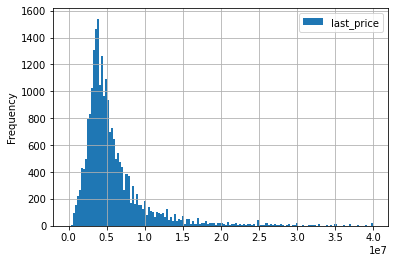

In [30]:
# Посмотрим сколько квартир стоимостью менее 500000 тыс. и более 100000000 млн., удалим эти строки

print('Квартир стоимостью меньше 500000 тыс. и стоимостью больше 100000000 млн.:', data.query('last_price < 500000 or last_price > 100000000')['last_price'].count())

data.drop(index=data.query('last_price < 500000 or last_price > 100000000').index,inplace=True)

#Построим гистограмму
data.plot(y = 'last_price', kind = 'hist', bins = 150, grid=True, label='last_price', range=(0,40000000))
data['last_price'].describe()

### total_area

квартир площадью менее 20 кв.м.и более 200 кв.м.: 222


count    23292.000000
mean        58.179572
std         26.434690
min         20.000000
25%         40.000000
50%         51.900000
75%         68.812500
max        200.000000
Name: total_area, dtype: float64

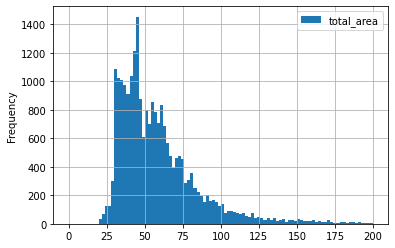

In [31]:
#Посмотри сколько квартир площадью менее 20 кв.м.и более 200 кв.м.
print('квартир площадью менее 20 кв.м.и более 200 кв.м.:', data.query('total_area < 20 or total_area > 200')['total_area'].count())
data.drop(index=data.query('total_area < 20 or total_area > 200').index,inplace=True)
#Построим гистограмму
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, label='total_area', range=(0,200))
data['total_area'].describe()

### rooms

count    23292.000000
mean         2.036193
std          0.994953
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
24


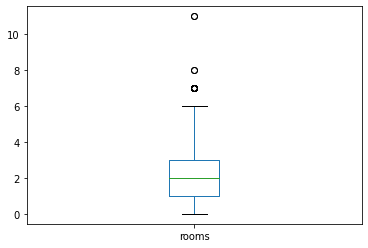

In [32]:
#посмотрим на значения
print(data['rooms'].describe())

# Построим BoxPlot и удалим аномальные значения
print(data.plot(y='rooms', kind='box'));
print(data.query('rooms > 6')['rooms'].count());
data.drop(index=data.query('rooms > 6').index,inplace=True);

### ceiling_height

In [33]:
# Нас интересуют потолки от 2,5 до 3,5 метров, потолки от 25 метров до 35 метров будем считать за опечатку и изменим их
print('потолки < 2.5 mетров:', data.query('ceiling_height < 2.5')['ceiling_height'].count())
print('потолки > 3.5 mетров:', data.query('ceiling_height < 3.5')['ceiling_height'].count())
print('потолки >= 25 mетров и <= 35 метров:', data.query('ceiling_height >= 25 or ceiling_height <= 35')['ceiling_height'].count())
print('потолки > 35 mетров:', data.query('ceiling_height > 35')['ceiling_height'].count())

потолки < 2.5 mетров: 73
потолки > 3.5 mетров: 22902
потолки >= 25 mетров и <= 35 метров: 23268
потолки > 35 mетров: 1


In [34]:
# Обновляем потолки с 25м по 35м, делим на 10
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 36)]['ceiling_height'] / 10)
# Удаляем ячейки
data.drop(index=data.query('ceiling_height < 2.5 or ceiling_height > 3.5').index,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22960 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22960 non-null  int64         
 1   last_price            22960 non-null  float64       
 2   total_area            22960 non-null  float64       
 3   first_day_exposition  22960 non-null  datetime64[ns]
 4   rooms                 22960 non-null  int64         
 5   ceiling_height        22960 non-null  float64       
 6   floors_total          22960 non-null  int64         
 7   living_area           22960 non-null  int64         
 8   floor                 22960 non-null  int64         
 9   is_apartment          22960 non-null  bool          
 10  studio                22960 non-null  bool          
 11  open_plan             22960 non-null  bool          
 12  kitchen_area          22960 non-null  int64         
 13  balcony         

### living_area


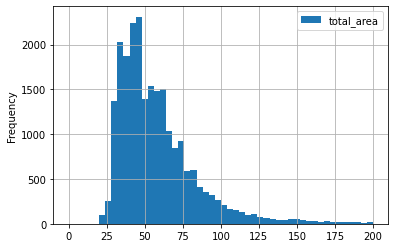

In [35]:
# Проверим есть ли жилая площадь больше общей, если есть удалим
data.query('living_area >= total_area')['living_area'].count()

# посмотрим на график
data.plot(y = 'total_area', kind = 'hist', bins = 50, grid=True, label='total_area', range=(0,200));

### kitchen_area

In [36]:
# проверим кухни менее 3 кв.м и более 30 кв.м если есть удалим
print(data.query('kitchen_area < 3 or kitchen_area > 30')['ceiling_height'].count())
data.drop(index=data.query('kitchen_area < 3 or kitchen_area > 30').index,inplace=True)

240


### balcony

AxesSubplot(0.125,0.125;0.775x0.755)


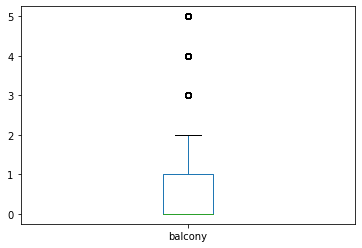

In [37]:
# Посмотрим на количество болконов
print(data.plot(y='balcony', kind='box'))
# Удалим где больше 2 балконов
data.drop(index=data.query('balcony > 2').index,inplace=True);

### days_exposition

объявления продавались больше 2 лет: 688
None


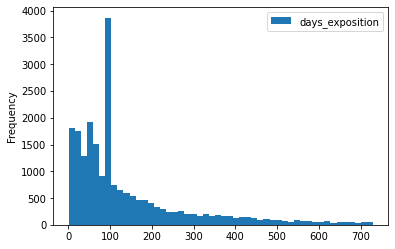

In [38]:
# проверим объявления которые продавались более 2 лет
print('объявления продавались больше 2 лет:', data.query('days_exposition > 365*2')['days_exposition'].count())
print(data.drop(index=data.query('days_exposition > 365*2').index,inplace=True))
data.plot(y='days_exposition', kind='hist', bins=50);

### airports_nearest

1


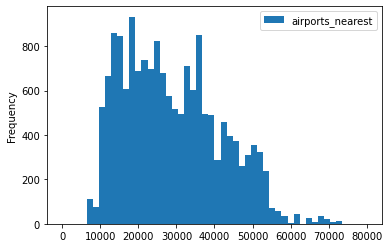

In [39]:
print(data.query('airports_nearest < 5000')['airports_nearest'].count())
data.drop(index=data.query('airports_nearest < 5000').index,inplace=True)
data.plot(y='airports_nearest', kind='hist', bins=50, range=(0,80000));

### Посчитайте и добавьте в таблицу новые столбцы

1. цена одного квадратного метра;
2. день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3. месяц публикации объявления;
4. год публикации объявления;
5. тип этажа квартиры (значения — «‎первый», «последний», «другой»);
6. расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [40]:
# Подсчитаем цену одного квадратного метра.
data['price_one_meter'] = data['last_price'] / data['living_area']
data['price_one_meter'].astype('int64')

0         254901
1         186111
2         152823
3        2163333
5         206428
          ...   
23693     115000
23695      81578
23696      86206
23697     382500
23698     112500
Name: price_one_meter, Length: 21497, dtype: int64

In [41]:
# Добавляем день публикации объявления
data['dayofweek'] = data['first_day_exposition'].dt.dayofweek

In [42]:
# Добавляем месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

In [43]:
# Добавляем год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

In [44]:
# Добавляем тип этажа квартиры (значения — «первый», «последний», «другой»);
def floor_category(row):
    if row['floor']==1:
        return "Первый"
    if row['floor']==row['floors_total']:
        return "Последний"
    return "Другой"
data['floor_category']=data.apply(floor_category, axis=1)

In [45]:
print(data['floor_category'].value_counts())
data.head()

Другой       15826
Последний     2968
Первый        2703
Name: floor_category, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,dayofweek,month,year,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,санкт-петербург,18863.0,16028,1,482.0,2,755.0,95,2.549020e+05,3,3,2019,Другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18,1,False,False,False,11,2,поселок шушары,12817.0,18603,0,0.0,0,0.0,81,1.861111e+05,1,12,2018,Первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34,4,False,False,False,8,0,санкт-петербург,21741.0,13933,1,90.0,2,574.0,558,1.528235e+05,3,8,2015,Другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30,9,False,False,False,9,0,санкт-петербург,28098.0,6800,2,84.0,3,234.0,424,2.163333e+06,4,7,2015,Другой
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14,5,False,False,False,9,0,поселок городского типа янино-1,99999.0,99999,99999,0.0,99999,0.0,55,2.064286e+05,0,9,2018,Другой


In [46]:
#добавим столбец соотношения жилой плозади к общей
data['living_total'] = data['living_area'] / data['total_area']

#добавим столбец отношения площади кухни к общей
data['kitchen_total'] = data['kitchen_area'] / data['total_area']

In [47]:
data['city_centers_nearest_km'] = data['city_centers_nearest']/1000
try:
    data['city_centers_nearest_km'] =  data['city_centers_nearest_km'].astype('int')
    print('city_centers_nearest_km ok')
except:
    print('city_centers_nearest_km int fail')

city_centers_nearest_km ok


### Проведите исследовательский анализ данных

### Изучение параметров объектов:
1. Общая площадь

count    21497.000000
mean        56.328443
std         24.421195
min         20.000000
25%         39.400000
50%         50.100000
75%         66.200000
max        200.000000
Name: total_area, dtype: float64


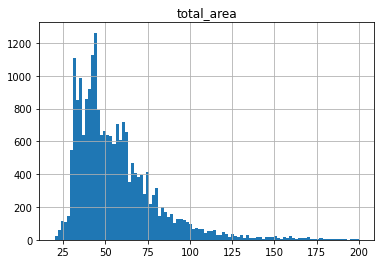

In [48]:
print(data['total_area'].describe())
data.hist('total_area', bins=100);

Из графика видно что в основном это объекты от 30 до 100 кв.м. среднее 56 кв.м.

2. Жилая площадь

count    21497.000000
mean        31.867889
std         15.754751
min          2.000000
25%         18.000000
50%         30.000000
75%         39.000000
max        164.000000
Name: living_area, dtype: float64


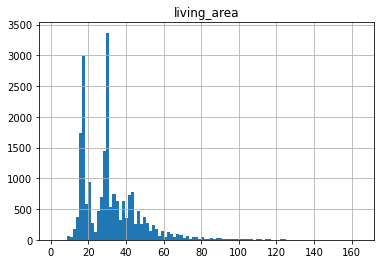

In [49]:
print(data['living_area'].describe())
data.hist('living_area', bins=100);

Больше всего объявлений 18 кв.м жилой площади. И от 25 до 43 кв.м. Среднее 32 кв.м.

3. Площадь кухни

count    21497.000000
mean         9.597339
std          3.833411
min          3.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         30.000000
Name: kitchen_area, dtype: float64


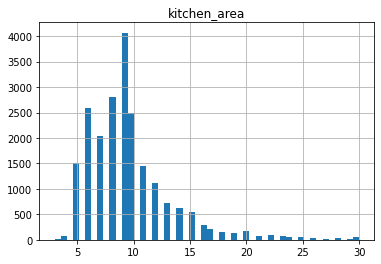

In [50]:
print(data['kitchen_area'].describe())
data.hist('kitchen_area', bins=50);

Среднее значение 9 кв.м. площадь кухни

4. Цена объекта

In [51]:
data['last_price_query'] = data['last_price'] / 1000000

count    21497.000000
mean         5.653208
std          4.779777
min          0.500000
25%          3.390000
50%          4.500000
75%          6.400000
max         98.000000
Name: last_price_query, dtype: float64


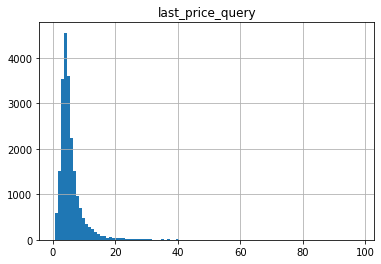

In [52]:
print(data['last_price_query'].describe())
data.hist('last_price_query', bins=100);

Средняя цена 5.5 млн. максимальная цена 9.5 млн. а минимальная 500 тыс., график выглядит нормально

5. Количество комнат

count    21497.000000
mean         1.990324
std          0.964430
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


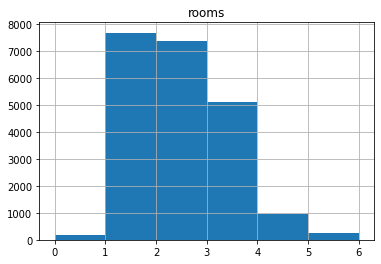

In [53]:
print(data['rooms'].describe())
data.hist('rooms', bins=6);

Средняе количество комнат 2. даже есть 6 комнатные квартиры

6. Высота потолков

count    21497.000000
mean         2.677635
std          0.168688
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.500000
Name: ceiling_height, dtype: float64


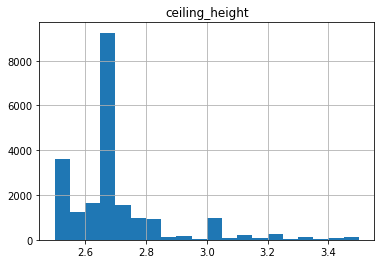

In [54]:
print(data['ceiling_height'].describe())
data.hist('ceiling_height', bins=20);

Средняя высота потолков 2.67 м.

7. Этаж квартиры

count    21497.000000
mean         5.885193
std          4.871911
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


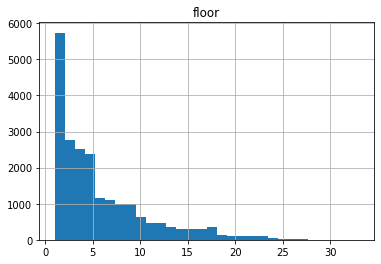

In [55]:
print(data['floor'].describe())
data.hist('floor', bins=30);

Среднее 5 этаж. Но больше всего объявлений имеют 2 этаж

8. Тип этажа квартиры («первый», «последний», «другой»)

count      21497
unique         3
top       Другой
freq       15826
Name: floor_category, dtype: object


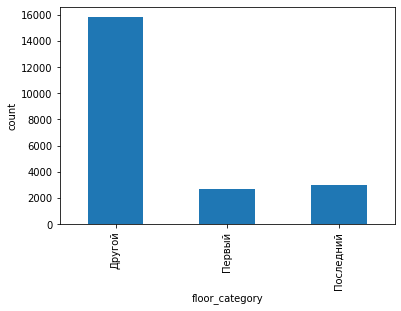

In [56]:
print(data['floor_category'].describe())
data.groupby(by='floor_category')['floor_category'].count().plot(kind='bar', ylabel = 'count');

Первый и последний примерно одинаковое количество объявлений, чаще всего это 3 этаж.

9. Общее количество этажей в доме

count    21497.000000
mean        10.761269
std          6.614023
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


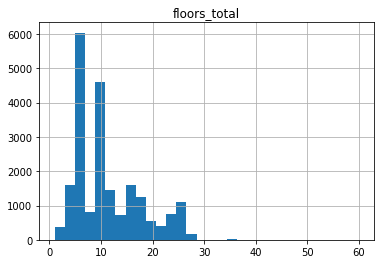

In [57]:
print(data['floors_total'].describe())
data.hist('floors_total', bins=30);

Чаще всего это 5 этажное здание и 10

10. Расстояние до центра города в метрах

count    21497.000000
mean     34989.263944
std      37245.881962
min        181.000000
25%      11312.000000
50%      15176.000000
75%      47684.000000
max      99999.000000
Name: city_centers_nearest, dtype: float64


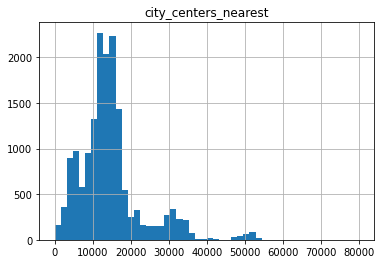

In [58]:
print(data['city_centers_nearest'].describe())
data.hist('city_centers_nearest', bins=50, range=(0,80000));

Среднее значение до центра города это 11 км. максимум 66 км.

11. Расстояние до ближайшего аэропорта

count    21497.000000
mean     45984.699679
std      32383.791090
min       6450.000000
25%      20904.000000
50%      33977.000000
75%      57575.000000
max      99999.000000
Name: airports_nearest, dtype: float64


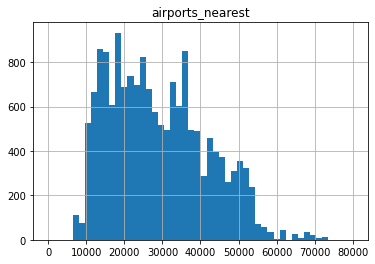

In [59]:
print(data['airports_nearest'].describe())
data.hist('airports_nearest', bins=50, range=(0,80000));

Расстояние колеблится от 10 км. до 50 км. 

12. Расстояние до ближайшего парка

count    21497.00000
mean       161.47188
std        301.83805
min          0.00000
25%          0.00000
50%          0.00000
75%        282.00000
max       3190.00000
Name: parks_nearest, dtype: float64


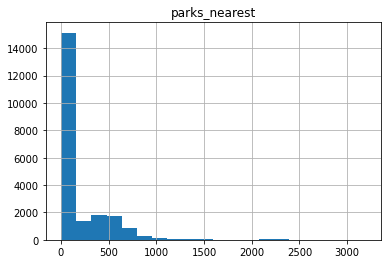

In [60]:
print(data['parks_nearest'].describe())
data.hist('parks_nearest', bins=20);

Среднее до ближайшего парка 161 метра дальше всех 3 км. 0 парков рядом нет

13. День и месяц публикации объявления

count    21497.000000
mean         6.407592
std          3.488622
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64
count    21497.000000
mean         2.574313
std          1.788521
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: dayofweek, dtype: float64


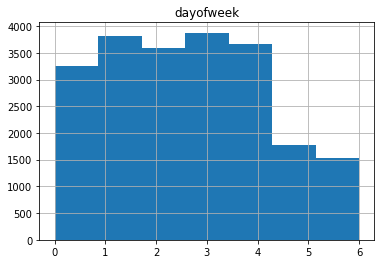

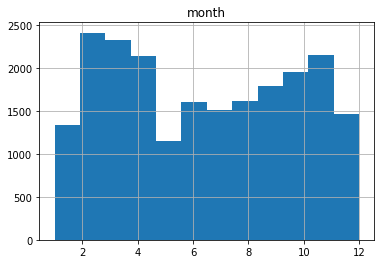

In [61]:
print(data['month'].describe())
print(data['dayofweek'].describe())
data.hist('dayofweek', bins=7);
data.hist('month', bins=12);



Много объявлений с февраля по апрель и с сентября по ноябрь по выходным количество объявлений падает

#### Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
Среднее время продажи квартиры: 141.88691445317951
Медианное время продажи квартиры: 95.0


count    21497.000000
mean       141.886914
std        145.429885
min          1.000000
25%         45.000000
50%         95.000000
75%        179.000000
max        730.000000
Name: days_exposition, dtype: float64

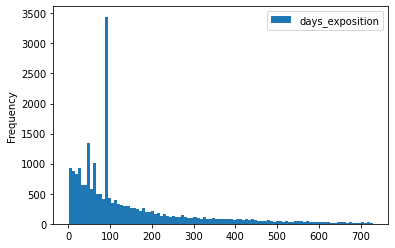

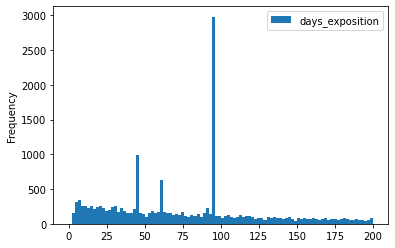

In [62]:
print(data.plot(y='days_exposition', kind='hist', bins=100))
print(data.plot(y='days_exposition', kind='hist', bins=100, range =(0,200)))
print('Среднее время продажи квартиры:', data['days_exposition'].mean())
print('Медианное время продажи квартиры:', data['days_exposition'].median())
data['days_exposition'].describe()

Среднее время продажи квартиры: 149 дней 
Медианное время продажи квартиры: 90 дней
Так же есть выбивающиеся значения на 45, 60, 95 дней.

Сроки, в течение которых объявление о продаже считается актуальным.

в других регионах <br>
Квартира От 45 дней <br>
Комната	45 дней <br>
Дом, участок 90 дней <br>
Гараж, машиноместо 30 дней

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

###### Изучите, зависит ли цена от:
1. общей площади

0.7197166467874166

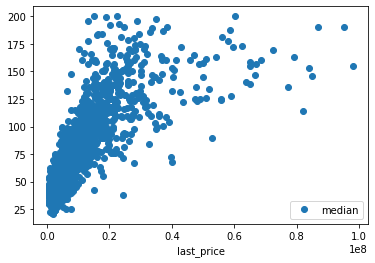

In [63]:
pivot_table_total_area = data.pivot_table(index = 'last_price', values = 'total_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])

Из графика видно , что зависимость цены от площади есть, но она не такая уж сильная. При возрастании площади и цена возрастает

2. жилой площади

0.5781845954015202

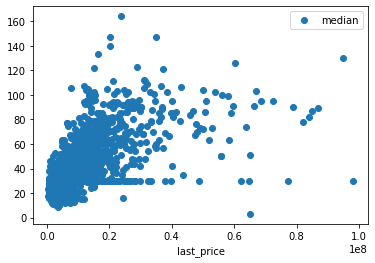

In [64]:
pivot_table_living_area = data.pivot_table(index = 'last_price', values = 'living_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_living_area.columns = ['mean', 'count', 'median']
pivot_table_living_area.plot(y = 'median', style = 'o')

pivot_table_living_area.sort_values('median', ascending = False)

data['living_area'].corr(data['last_price'])

От жилой площади цена зависит уже меньше чем от общей.

3. площади кухни

0.473096895443905

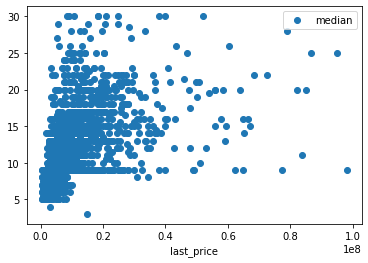

In [65]:
pivot_table_living_area = data.pivot_table(index = 'last_price', values = 'kitchen_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_living_area.columns = ['mean', 'count', 'median']
pivot_table_living_area.plot(y = 'median', style = 'o')

pivot_table_living_area.sort_values('median', ascending = False)

data['kitchen_area'].corr(data['last_price'])

Цена практически независит от площади кухни

4. количества комнат

0.4280765084594619

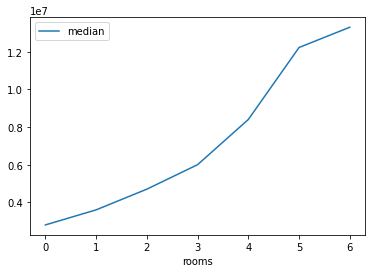

In [66]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)



data['rooms'].corr(data['last_price'])

Зависимость от количества комнат практически нету

5. этажа, на котором расположена квартира (первый, последний, другой);

,mean,count,median
floor_category,,,
Другой,5.907735e+06,15826,4700000.0
Первый,4.462814e+06,2703,3850000.0
Последний,5.380124e+06,2968,4190000.0


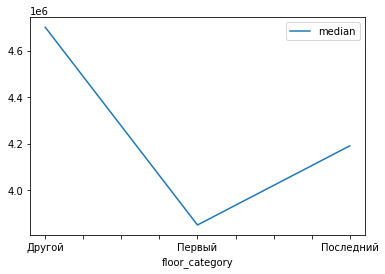

In [67]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

На первом этаже цена ниже чем на последнем, но еще выше цена на другом этаже

6. даты размещения (день недели, месяц, год)

,mean,count,median
dayofweek,,,
1,5.683977e+06,3815,4600000.0
2,5.669172e+06,3581,4550000.0
0,5.663292e+06,3251,4500000.0
3,5.791509e+06,3876,4500000.0
5,5.668157e+06,1773,4500000.0
4,5.529567e+06,3668,4489000.0
6,5.446822e+06,1533,4480000.0


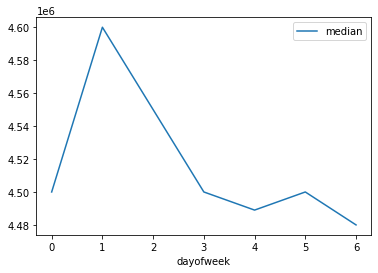

In [68]:
pivot_table_weekday_exposition = data.pivot_table(index = 'dayofweek', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

Цена независит от размещения дня недели, да она выше во вторник но немного

,mean,count,median
month,,,
4,5.592895e+06,2147,4690000.0
12,5.842995e+06,1471,4600000.0
9,5.804935e+06,1796,4550000.0
11,5.659261e+06,2158,4535000.0
1,5.537357e+06,1342,4500000.0
2,5.718853e+06,2415,4500000.0
3,5.624047e+06,2328,4500000.0
8,5.800417e+06,1614,4500000.0
10,5.473208e+06,1954,4500000.0


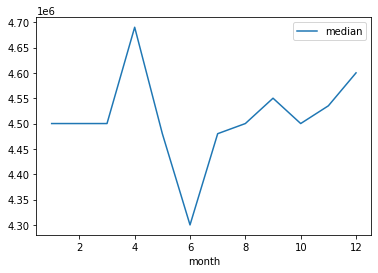

In [69]:
pivot_table_weekday_exposition = data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

От месяца размещения цена независит

,mean,count,median
year,,,
2014,1.151769e+07,55,8200000.0
2015,7.010050e+06,713,4990000.0
2019,6.001949e+06,2685,4950000.0
2018,5.439238e+06,8036,4500000.0
2016,5.808867e+06,2362,4400000.0
2017,5.538827e+06,7646,4390000.0


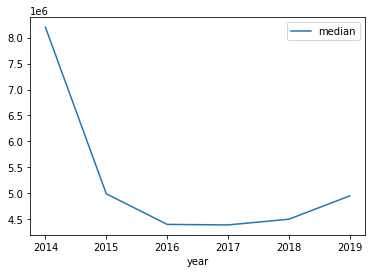

In [71]:
pivot_table_weekday_exposition = data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

От года размещения цена независит

### Вывод
Больше всего цена зависит от общей площади, меньше от жилой площади и площади кухни, и независит цена от года месяца и дня размещения

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [72]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_one_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
print(locality_pivot_table)
#самая высокая стоимость
print(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()])
#самая низкая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

                   count           mean
locality_name                          
санкт-петербург    14102  213484.582676
поселок мурино       518  173455.857637
поселок шушары       415  156369.822465
всеволожск           366  134470.431115
пушкин               329  191876.080892
колпино              320  133430.717549
поселок парголово    318  199458.377939
гатчина              281  121997.705090
деревня кудрово      274  185447.463848
выборг               218   99722.964908
                 count           mean
locality_name                        
санкт-петербург  14102  213484.582676


,count,mean
locality_name,,
выборг,218,99722.964908


<p>Самая высокая стоимость жилья в санкт-петербурге</p>
<p>Самая низкая стоимость жилья в выборге</p>

### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [73]:
saint_petersburg = data.query('locality_name == "санкт-петербург"').reset_index(drop=True)
saint_petersburg

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,dayofweek,month,year,floor_category,living_total,kitchen_total,city_centers_nearest_km,last_price_query
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,санкт-петербург,18863.0,16028,1,482.0,2,755.0,95,2.549020e+05,3,3,2019,Другой,0.472222,0.231481,16,13.000
1,10,5196000.0,56.00,2015-08-20,2,2.65,5,34,4,False,False,False,8,0,санкт-петербург,21741.0,13933,1,90.0,2,574.0,558,1.528235e+05,3,8,2015,Другой,0.607143,0.142857,13,5.196
2,0,64900000.0,159.00,2015-07-24,3,2.65,14,30,9,False,False,False,9,0,санкт-петербург,28098.0,6800,2,84.0,3,234.0,424,2.163333e+06,4,7,2015,Другой,0.188679,0.056604,6,64.900
3,5,7915000.0,71.60,2019-04-18,2,2.65,24,30,22,False,False,False,18,2,санкт-петербург,23982.0,11634,0,0.0,0,0.0,95,2.638333e+05,3,4,2019,Другой,0.418994,0.251397,11,7.915
4,18,5400000.0,61.00,2017-02-26,3,2.50,9,43,7,False,False,False,6,2,санкт-петербург,50898.0,15008,0,0.0,0,0.0,289,1.255814e+05,6,2,2017,Другой,0.704918,0.098361,15,5.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14097,19,9200000.0,101.00,2019-04-01,3,3.05,15,63,12,False,False,False,15,0,санкт-петербург,15632.0,14428,0,0.0,0,0.0,23,1.460317e+05,0,4,2019,Другой,0.623762,0.148515,14,9.200
14098,13,3550000.0,35.30,2018-02-28,1,2.86,15,16,4,False,False,False,9,2,санкт-петербург,17284.0,16081,1,353.0,2,652.0,29,2.218750e+05,2,2,2018,Другой,0.453258,0.254958,16,3.550
14099,3,5500000.0,52.00,2018-07-19,2,2.65,5,31,2,False,False,False,6,0,санкт-петербург,20151.0,6263,1,300.0,0,0.0,15,1.774194e+05,3,7,2018,Другой,0.596154,0.115385,6,5.500
14100,11,9470000.0,72.90,2016-10-13,2,2.75,25,40,7,False,False,False,10,1,санкт-петербург,19424.0,4489,0,0.0,1,806.0,519,2.367500e+05,3,10,2016,Другой,0.548697,0.137174,4,9.470


In [74]:
last_price_km = saint_petersburg.pivot_table(index='city_centers_nearest_km', values='price_one_meter', aggfunc=['mean', 'median'])
last_price_km['last_price_km'] = saint_petersburg['last_price'] / saint_petersburg['city_centers_nearest_km']
last_price_km

,mean,median,last_price_km
,price_one_meter,price_one_meter,
city_centers_nearest_km,,,
0,251581.503948,197826.086957,8.125000e+05
1,236887.616288,205147.058824,3.996923e+05
2,231116.285422,186274.509804,1.081667e+07
3,221924.487608,184848.484848,7.195455e+05
4,264621.940505,214575.163399,3.600000e+05
5,311914.947163,222583.333333,3.884615e+05
6,312024.751133,234444.444444,3.321429e+05
7,257658.436976,215339.427134,6.700000e+05


In [75]:
print('Средняя цена одного километра:',int(last_price_km['last_price_km'].mean()))
print('Максимальная стоимость квадратного метра для каждого километра:',int(last_price_km['mean'].max()))
print('Минимальная стоимость квадратного метра для каждого километра:',int(last_price_km['mean'].min()))

Средняя цена одного километра: 1089189
Максимальная стоимость квадратного метра для каждого километра: 331854
Минимальная стоимость квадратного метра для каждого километра: 143313


Чем ближе к центру тем дороже цена <br>
Стоимость квадратного метра для каждого километра падает от удаленности от центра

### Общий вывод

Мы обработали полученный архив данных - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах. Изучая время продажи квартир мы выявили, что большое количество объявлений было автоматически снято с Яндекс Недвижимость.

Самая высокая стоимость жилья в санкт-петербурге <br>

Самая низкая стоимость жилья в выборге

#### Факторы, влияющие на стоимость

На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

#### Стоимость квадратного метра в топ-10 населённых пунктов

Дороже всего квадратный метр в Санкт-Петербурге - 207480
Дешевле всего квадратный метр в Гатчина	- 120684

Самая высокая стоимость жилья в санкт-петербурге

Самая низкая стоимость жилья в выборге

Средняя цена одного километра: 1089189
Максимальная стоимость квадратного метра для каждого километра: 331854 <br>
Минимальная стоимость квадратного метра для каждого километра: 143313 <br>
Чем ближе к центру тем дороже цена<br>
Стоимость квадратного метра для каждого километра падает от удаленности от центра